<a href="https://colab.research.google.com/github/Miyazaki-Kohei/LLMS/blob/main/Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -q -U google-generativeai

In [8]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [9]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('Gemini')

genai.configure(api_key=GOOGLE_API_KEY)

In [10]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [11]:
model = genai.GenerativeModel('gemini-pro')

In [14]:
%%time
response = model.generate_content("走れメロスのあらすじを教えてください")

CPU times: user 89.7 ms, sys: 11.3 ms, total: 101 ms
Wall time: 7.96 s


In [15]:
to_markdown(response.text)

> 走れメロスのあらすじは以下の通りです。
> 
> 主人公のメロスは、セリヌンテスの町で盗賊の一味を捕まえた功労により、城内の牢獄に囚えられていた。メロスにはシラクサにいる最愛の妹の婚約の日に立ち会いたいという願いがあった。メロスはこの願いを城代に伝えたところ、城代は無実のメロスを罰するために、メロスに無謀な条件を提示した。メロスが15日以内にシラクサに辿り着いた場合は自由の身となるが、辿り着けなかった場合は死刑に処するというものだった。
> 
> メロスは城代の条件を受諾し、妹の婚約式が行われるシラクサへと向かった。しかし、メロスが出発した後すぐに、盗賊の一味と内通していた城代は、密かにメロスを追跡する手配をしていた。メロスは旅の途中で盗賊の襲撃に遭い、身ぐるみを剥がれそうになった。しかし、メロスの誠実さと勇気に感銘を受けた盗賊たちは、メロスを助けて逃してくれた。
> 
> メロスは盗賊たちとの出会いで、人間に対する信頼を取り戻した。そして、メロスは盗賊たちに助けられた恩義を返すために、盗賊団が役人たちから追われていることを密告した。メロスは盗賊の隠れ家を役人に教えてしまったが、メロスは盗賊に追われる身となった。しかし、メロスは盗賊たちから逃げ延びた。
> 
> メロスは旅の途中で様々な困難に遭遇したが、メロスは常に妹の婚約式への参加を信じていた。メロスは15日間の猶予を数日残して、シラクサに到着した。メロスは妹の婚約式に間に合い、妹と再会した。

## 画像

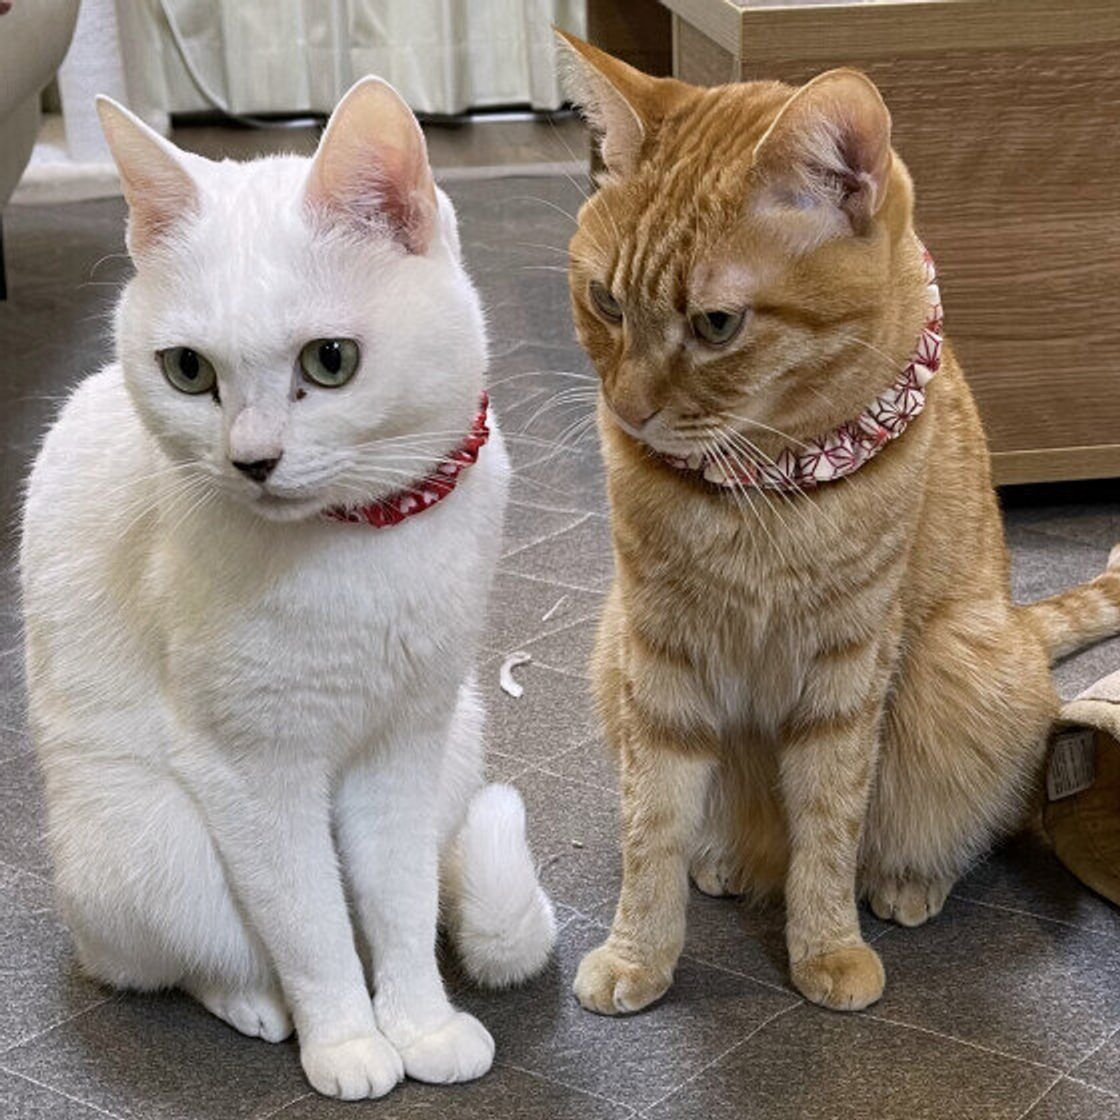

In [16]:
import PIL.Image

img = PIL.Image.open('/content/5555a513-8a71-464e-ae12-fb91e4373aec.jpg')
img

In [17]:
model = genai.GenerativeModel('gemini-pro-vision')

In [18]:
response = model.generate_content(img)

to_markdown(response.text)

>  「ねぇ、私ってば、世界で一番可愛い猫ちゃんよね？」
> 「うるさいなぁ。俺の方が可愛いんだから」
> 「えー、そんなことないわよ。私の方がずっと可愛いもん」
> 「うるさいってば。俺の方が可愛いんだから」
> 「・・・・・・喧嘩するのやーめた」

In [19]:
response = model.generate_content(["この写真に基づいて、短くて魅力的な短編小説を書いてください。", img], stream=True)
response.resolve()

In [20]:
to_markdown(response.text)

>  2匹の猫が向かい合って座っていました。一匹は白くて、もう一匹は茶色でした。2匹とも同じように首輪をつけていて、とてもおとなしそうに見えました。
> 
> しばらくの間、2匹は互いに見つめ合っていました。そして、白い猫が口を開きました。
> 
> 「ねえ、私、あなたのことずっと気になってたの」
> 
> 茶色の猫は驚いた様子で、白い猫を見つめました。
> 
> 「え？そうなの？」
> 
> 「ええ。あなたはいつも一人でいるみたいで、なんだか寂しそうに見えたの」
> 
> 「そうかな？僕は別に寂しくなんかないよ」
> 
> 「でも、いつも一人でいるじゃない。友達もいないみたいだし」
> 
> 「僕は友達なんて必要ないんだ。僕は一人で十分」
> 
> 「でも、友達がいればもっと楽しい人生が送れると思うな」
> 
> 「そうかもしれないけど、僕は一人でいるのが好きなんだ」
> 
> 「そうなのね」
> 
> 白い猫は少し残念そうでしたが、茶色の猫の気持ちを尊重することにしました。
> 
> 「わかったわ。でも、もしあなたが友達が欲しくなったら、いつでも私に言ってね」
> 
> 「ありがとう。そうするよ」
> 
> 2匹の猫はしばらくの間、また見つめ合っていました。そして、白い猫が立ち上がりました。
> 
> 「そろそろ行かないと。また今度ね」
> 
> 「うん、またね」
> 
> 白い猫は振り返りもせずに歩き去ってしまいました。茶色の猫は白い猫を見送り、そしてまた一人になりました。
> 
> 茶色の猫は、白い猫のことが気になりました。白い猫は、茶色の猫が友達がいないことを心配していました。茶色の猫は、友達がほしいと思いました。でも、友達の作り方を知りませんでした。
> 
> 茶色の猫は、しばらくの間、考えました。そして、ある考えを思いつきました。
> 
> 茶色の猫は、白い猫の家の前に行きました。そして、ドアをノックしました。
> 
> ドアが開き、白い猫が出てきました。
> 
> 「こんにちは」
> 
> 「こんにちは。僕、友達になりたいと思って」
> 
> 「え？友達？」
> 
> 「うん。友達」
> 
> 「でも、私たちはほとんど話したことがないよね」
> 
> 「そうだけど、僕は君と友達になりたいと思ったんだ」
> 
> 「そうなの？ありがとう」
> 
> 白い猫は茶色の猫を家に招き入れました。2匹の猫は、しばらくの間、話をしました。そして、2匹は友達になりました。
> 
> 2匹の猫は、それから毎日一緒に遊ぶようになりました。2匹は、とても仲良くなりました。そして、2匹は幸せになりました。